In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
x_data = np.array([273.15, 278.15, 283.15, 293.15, 303.15, 313.15, 333.15, 353.15, 373.15])
y_data = np.array([1.787e-3, 1.519e-3, 1.307e-3, 1.002e-3, 7.975e-4, 6.529e-4, 4.665e-4, 3.547e-4, 2.828e-4])

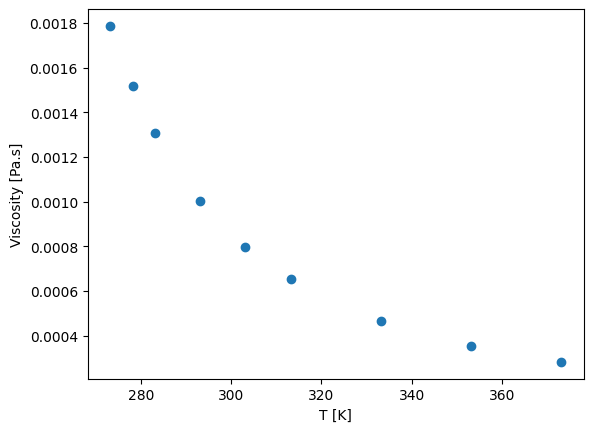

In [4]:
plt.scatter(x_data,y_data)
plt.xlabel('T [K]')
plt.ylabel('Viscosity [Pa.s]')
plt.show()

In [5]:
def model_f1(x, A, B, C, D, E):
    return A+ B*x + C*(x**2) + D*(x**3) + E*(x**4)

def model_f2(x,D,F):
    return D*np.exp(F/x)

In [6]:
#popt, pcov = curve_fit(model_f, x_data, y_data, p0=[5e-1,5e-3,5e-5,5e-7,5e-9])
popt1, pcov1 = curve_fit(model_f1, x_data, y_data, p0=[1,1,1,1,1])
popt2, pcov2 = curve_fit(model_f2, x_data, y_data, p0=[1,1])

In [7]:
print(popt1)
print(popt2)

[ 4.89289604e-01 -5.68901691e-03  2.49150843e-05 -4.86153138e-08
  3.56196066e-11]
[9.27400660e-07 2.05896728e+03]


In [8]:
a_opt, b_opt, c_opt, d_opt, e_opt = popt1
f_opt, g_opt = popt2

x_model = np.linspace(min(x_data), max(x_data), 100)
y_model1= model_f1(x_model, a_opt, b_opt, c_opt, d_opt, e_opt)
y_model2= model_f2(x_model, f_opt, g_opt)

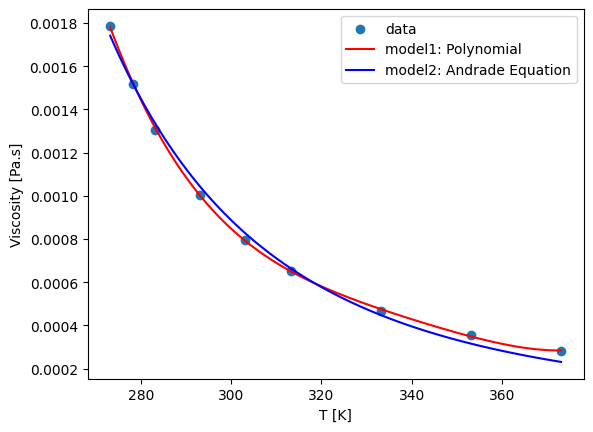

In [9]:
plt.scatter(x_data, y_data ,label='data')
plt.plot(x_model, y_model1, color='r', label='model1: Polynomial')
plt.plot(x_model, y_model2, color='b', label='model2: Andrade Equation')
plt.xlabel('T [K]')
plt.ylabel('Viscosity [Pa.s]')
plt.legend()
plt.show()